In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yellowbrick.classifier
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns

get_ipython().run_line_magic('matplotlib', 'inline')



In [2]:
df = pd.read_csv('./chronic_kidney.csv')
data = df


In [3]:
data.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})


In [6]:
data['dm'].value_counts()


0.0    261
1.0    137
Name: dm, dtype: int64

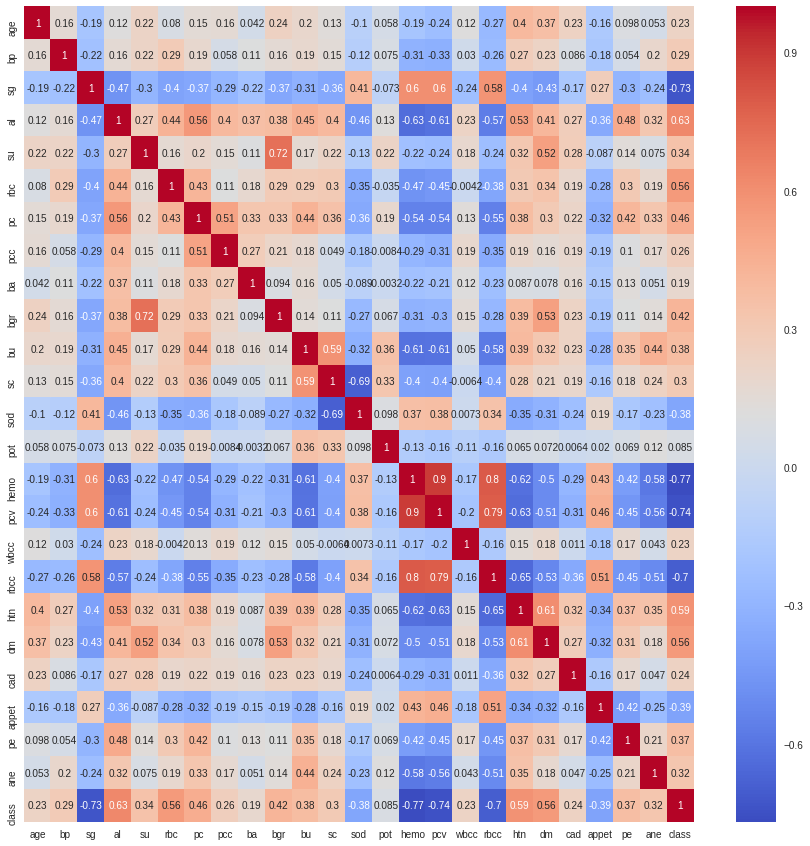

In [7]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row 


/home/mike/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/mike/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/mike/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mike/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


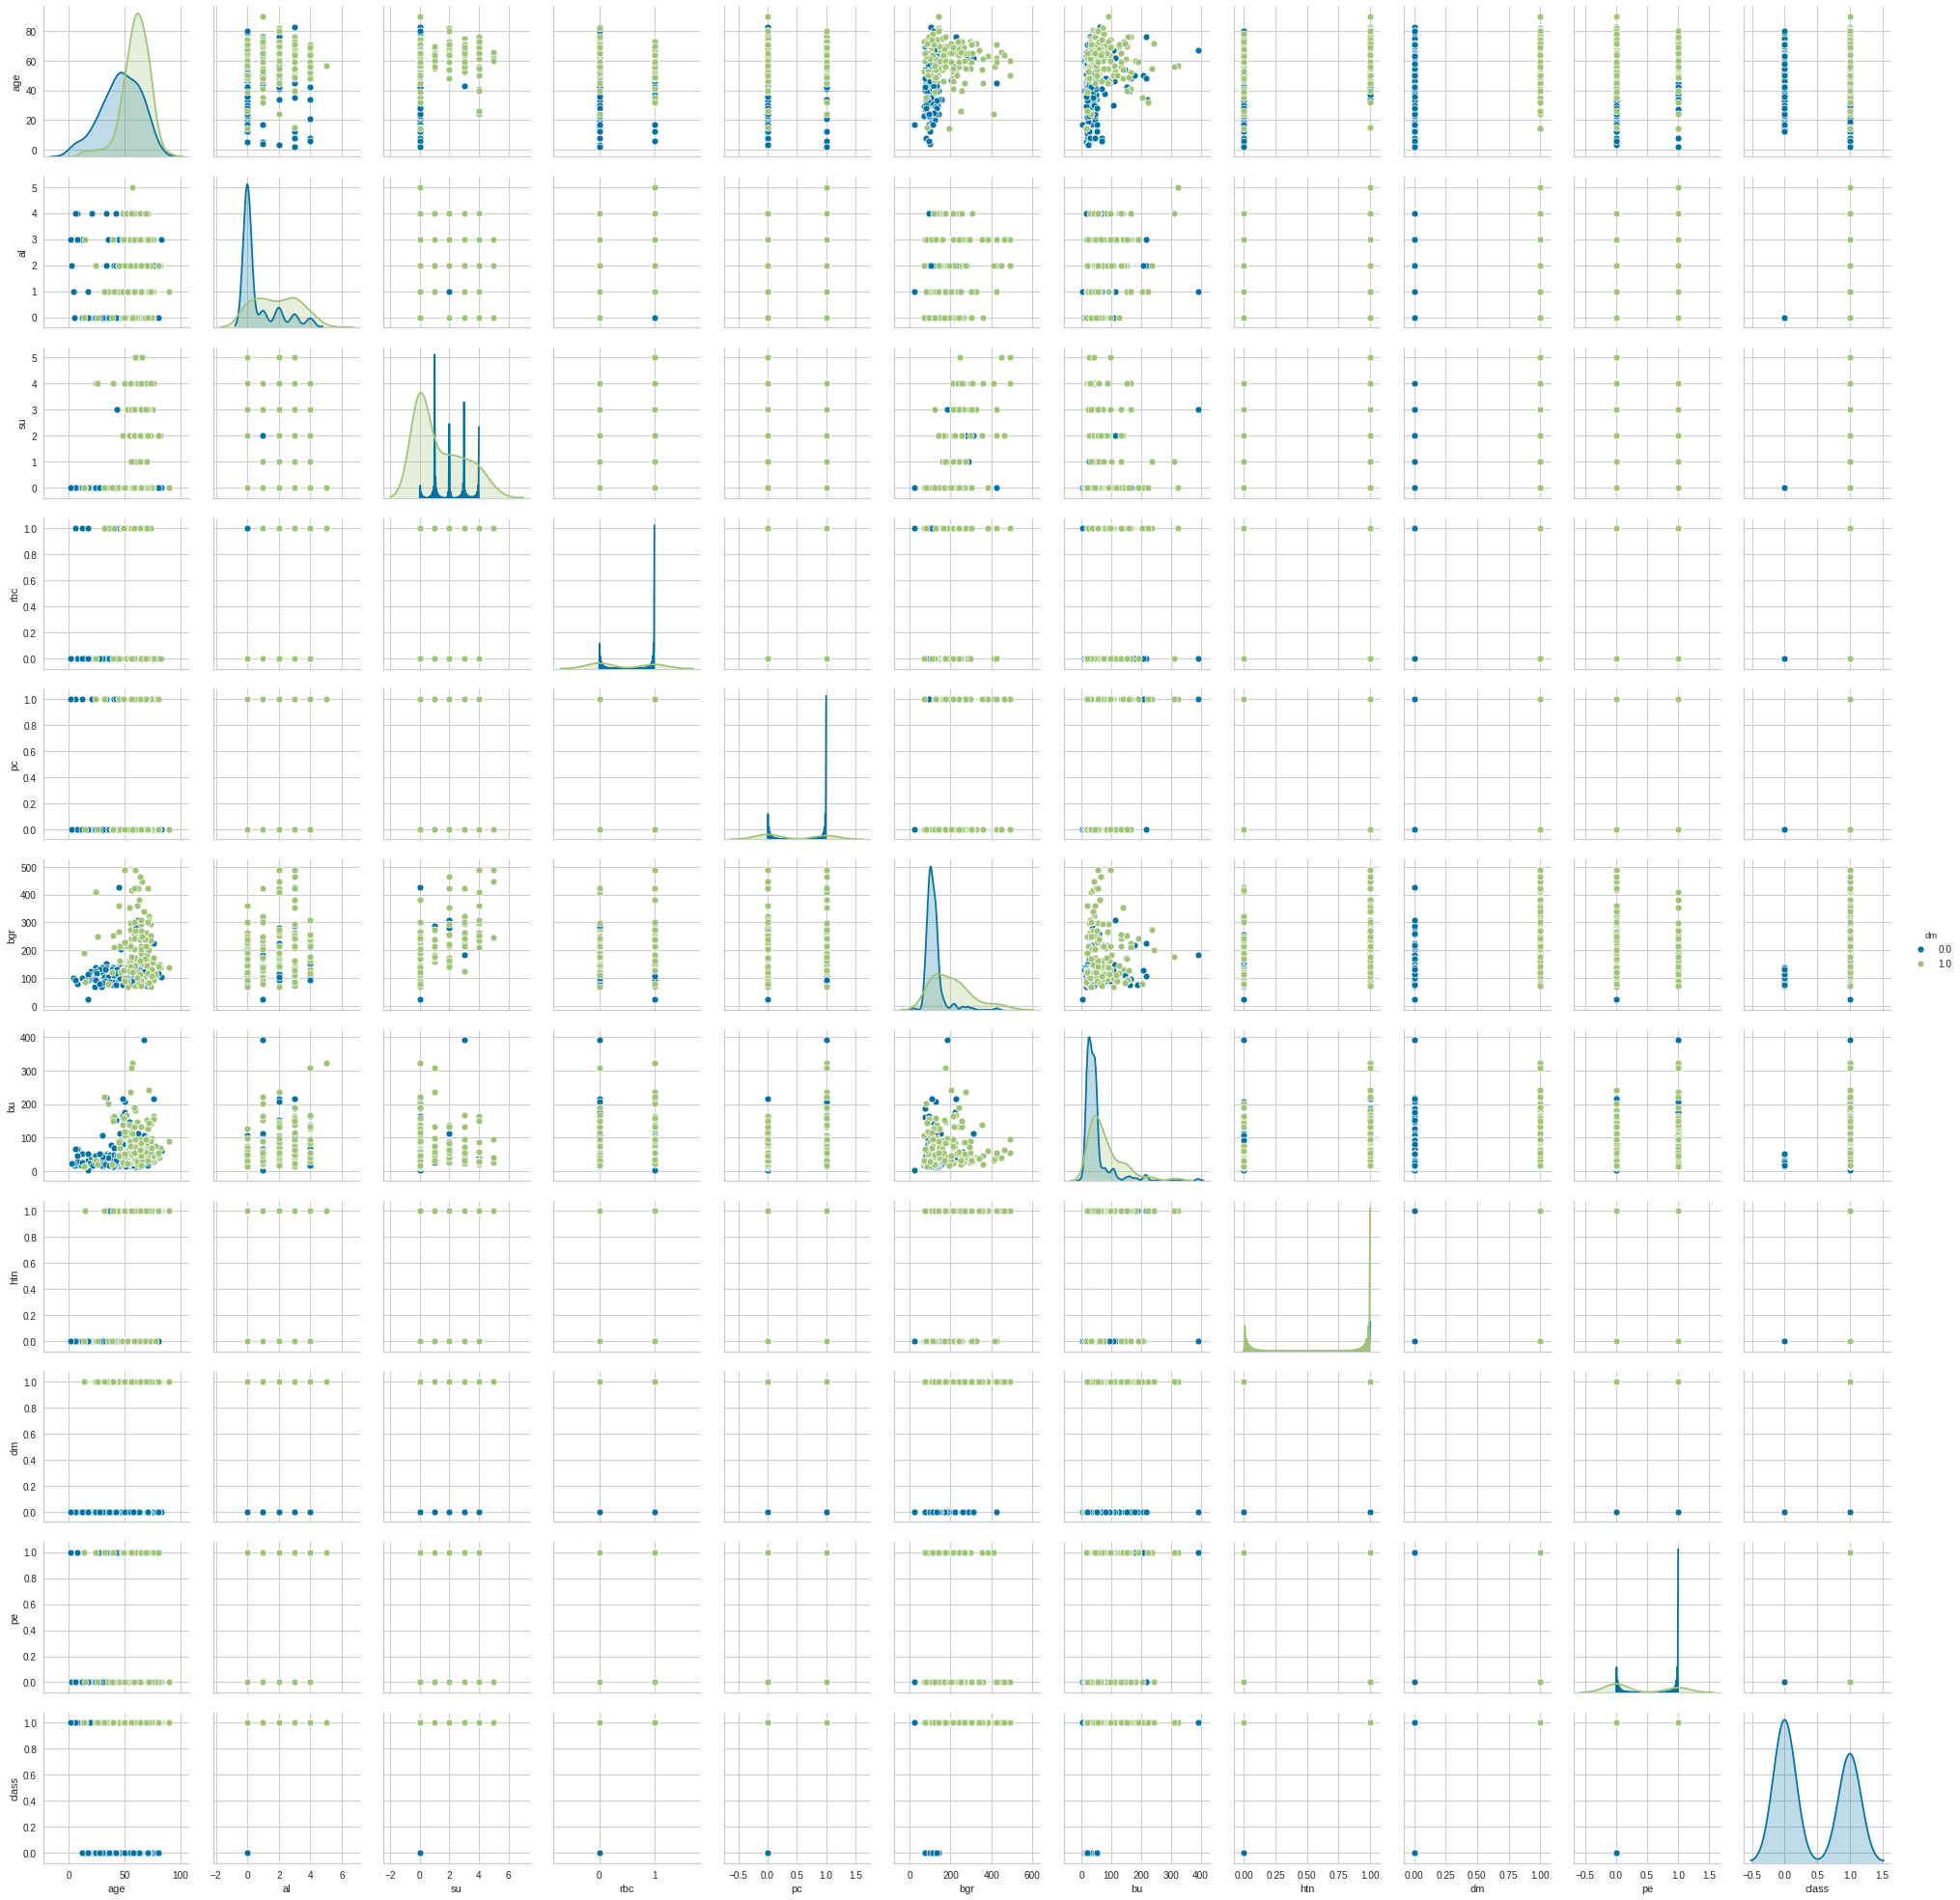

In [8]:
selected = data.drop(['sg','sod','hemo','pcv','rbcc','appet','bp','pcc','ba','sc','wbcc','pot','cad','ane'],axis='columns')
sns.pairplot(selected, hue='dm', height=2.5);


In [9]:
selected.shape

selected.columns


Index(['age', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'htn', 'dm', 'pe',
       'class'],
      dtype='object')

In [10]:
selected.isnull().sum()


age        9
al        46
su        49
rbc      152
pc        65
bgr       44
bu        19
htn        2
dm         2
pe         1
class      0
dtype: int64

In [12]:
data12 = selected
data12.dropna(inplace=True)


data12.isnull().sum() #Checking for any Null values
data12


,age,al,su,rbc,pc,bgr,bu,htn,dm,pe,class
2,62.0,2.0,3.0,0.0,0.0,423.0,53.0,0.0,1.0,0.0,1
3,48.0,4.0,0.0,0.0,1.0,117.0,56.0,1.0,0.0,1.0,1
4,51.0,2.0,0.0,0.0,0.0,106.0,26.0,0.0,0.0,0.0,1
7,24.0,2.0,4.0,0.0,1.0,410.0,31.0,0.0,1.0,1.0,1
8,52.0,3.0,0.0,0.0,1.0,138.0,60.0,1.0,1.0,0.0,1
9,53.0,2.0,0.0,1.0,1.0,70.0,107.0,1.0,1.0,0.0,1
11,63.0,3.0,0.0,1.0,1.0,380.0,60.0,1.0,1.0,1.0,1
14,68.0,3.0,2.0,0.0,1.0,157.0,90.0,1.0,1.0,1.0,1
20,61.0,2.0,0.0,1.0,1.0,173.0,148.0,1.0,1.0,1.0,1
22,48.0,4.0,0.0,0.0,1.0,95.0,163.0,1.0,0.0,0.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe49490a90>,
      dtype=object)

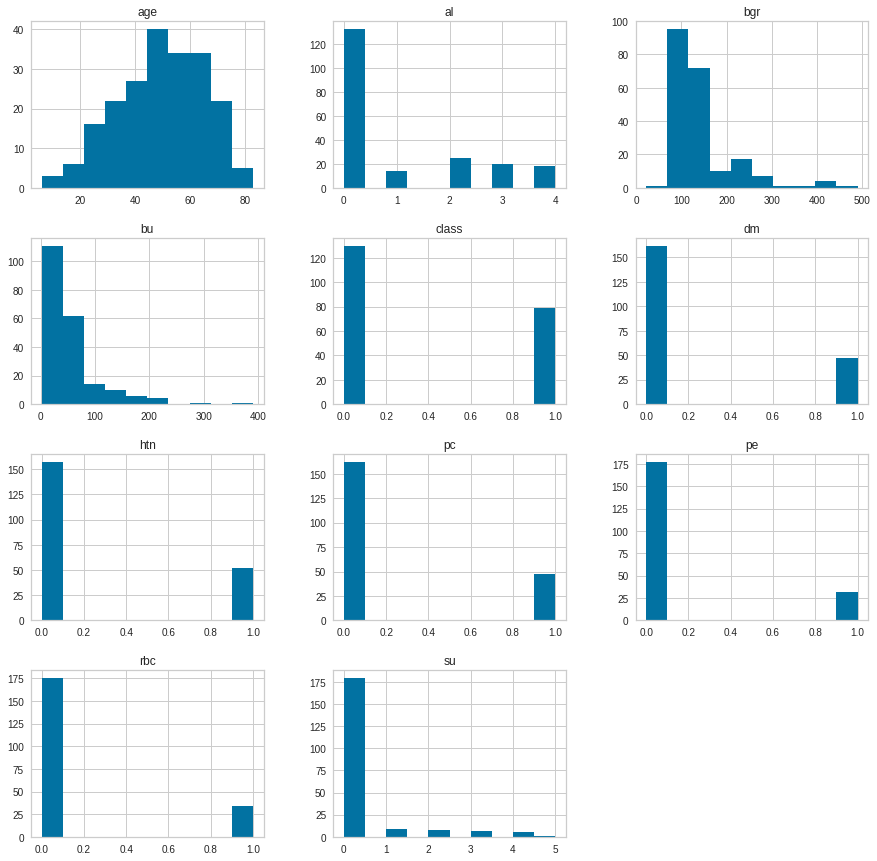

In [13]:
pd.DataFrame.hist(data12,figsize =[15,15])


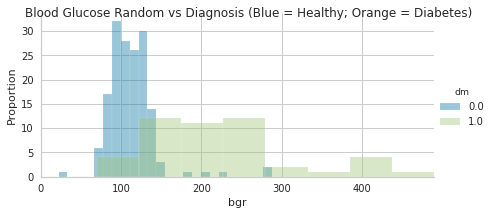

In [17]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()

plotHistogram(data12,"dm",'bgr','Blood Glucose Random vs Diagnosis (Blue = Healthy; Orange = Diabetes)')


# Plotting Learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt



In [18]:
from sklearn.linear_model import LogisticRegression


In [20]:
logreg = LogisticRegression()

# Specifying the target variable (dm) and its estimators (other features except dm)
X = data12.drop("dm", axis=1)
y = data12['dm']


In [21]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)


In [22]:
logreg.fit(X_train,y_train)


/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Pickle is used to serialize  (Save to disk memory ) and deserialize (Load from disk) the machine learning models
import pickle
#%%
# save the model to disk using pickle 
pickle.dump(logreg, open('logreg_deployed.pkl', 'wb'))


#%%
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)


/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

<module 'matplotlib.pyplot' from '/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

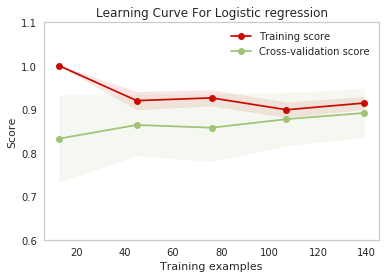

In [24]:

#Plot learning curve for Logistic Regression model
plot_learning_curve(logreg, 'Learning Curve For Logistic regression', X_train,y_train, (0.60,1.1), 10)



In [25]:
#Test accuracy of the machine learning model
from sklearn.metrics import accuracy_score, confusion_matrix


#%%
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))


Train Accuracy:  0.9230769230769231
Test Accuracy:  0.8867924528301887


In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')


True Neg: 38
False Pos: 3
False Neg: 3
True Pos: 9


/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


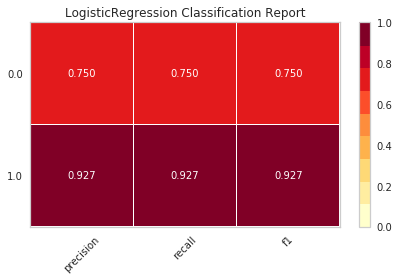

In [27]:
visualizer = ClassificationReport(logreg, classes=[1.0,0.0])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data


In [28]:
#testing deployed model
custom_data = [{'age': 68 ,
         'al': 0 ,
         'su': 0,
         'rbc': 1,
         'pc' : 1,
         'bgr': 100,
         'bu' : 54,
         'htn' : 0,
         'pe': 0,                
         'class' :1 
                 }] 
labels =['age', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'htn', 'pe', 'class']

#   Creates DataFrame. 
test = pd.DataFrame(custom_data)
test = test[labels]
test.columns
#test1 = logreg.fit(test)
predictor = logreg.predict(test)
print(predictor[0])



0.0


In [29]:
# ## K-Nearest Neighbors Classifier
#%% [markdown]
# I am going to balance the classes here before using KNN. Logistic regression was able to make accurate predictions even when trained on unbalanced classes, 
# but KNN is more sensitive to unbalanced classes

#%%
data12["dm"].value_counts()

# Splitting the dm classes i.e 0.0 and 1.0
dm_0 = data12[data12["dm"] == 0]
dm_1 = data12[data12["dm"] == 1]

#Oversampling the deficient class so as to balance them 
selected_class_1_over = dm_1.sample(162, replace=True)
selected_test_1_over = pd.concat([dm_0,selected_class_1_over], axis = 0)
selected_test_1_over["dm"].value_counts()


1.0    162
0.0    162
Name: dm, dtype: int64

In [30]:
# Specifying the target variable (dm) and its estimators (other features except dm)
X = selected_test_1_over.drop("dm", axis=1)
y = selected_test_1_over["dm"]


#%%
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)


#%%
# Scaling the training and test data for KNN using StandardScaler()
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)




/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


True Neg: 34
False Pos: 7
False Neg: 0
True Pos: 40


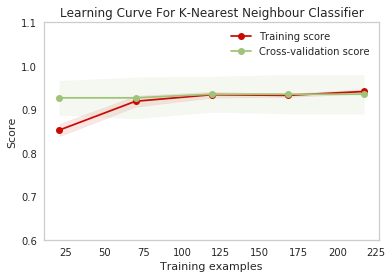

In [31]:
from sklearn.neighbors import KNeighborsClassifier


#%%
knn = KNeighborsClassifier()
params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

#Grid search CV is for hyper-tuning the estimators so as to have a better classication model.
gs = GridSearchCV(knn, param_grid=params)
model = gs.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

plot_learning_curve(knn, 'Learning Curve For K-Nearest Neighbour Classifier', X_train,y_train, (0.60,1.1), 10)

#%%
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')



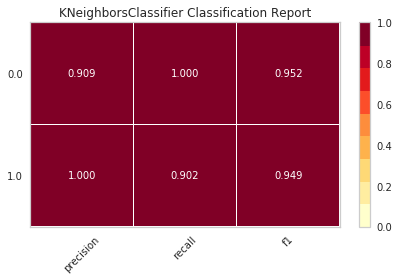

Train Accuracy:  0.9423868312757202
Test Accuracy:  0.9506172839506173


In [32]:
#YELLOWBRICK CLASSIFICATION REPORT
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn, classes=[1.0,0.0])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

#%%
test_knn_pred = knn.predict(X_test)
train_knn_pred = knn.predict(X_train)

#%%
# Printing accuracy scores of the  test and train data of the model
print('Train Accuracy: ', accuracy_score(y_train, train_knn_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_knn_pred))

#%%
import pickle
#%%
# save the model to disk using pickle 
pickle.dump(model, open('knn_deployed.pkl', 'wb'))

#Testing out the deserialzed KNN model
#model12 = pickle.load(open('./knn_deployed.pkl', 'rb'))
#preds1 = model12.predict(X_test)
#accuracy_score(y_test, preds1)
